In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
train.drop('BHK_OR_RK', inplace=True, axis=1)
train.drop('ADDRESS', inplace=True, axis=1)

In [6]:
df_one = pd.get_dummies(train["POSTED_BY"])

In [7]:
df_two = pd.concat((df_one, train), axis=1)
df_two = df_two.drop(["POSTED_BY"], axis=1)

In [8]:
df_two

,Builder,Dealer,Owner,UNDER_CONSTRUCTION,RERA,BHK_NO,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,1,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,1,0,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,1,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,0,1,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,0,1,0,1,0,2,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,1,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,1,0,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,1,0,0,2,927.079009,1,1,12.900150,80.227910,67.0


In [9]:
X=df_two.iloc[:,:-1]
Y=df_two.iloc[:,-1]

In [10]:
X

,Builder,Dealer,Owner,UNDER_CONSTRUCTION,RERA,BHK_NO,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,0,0,1,0,0,2,1300.236407,1,1,12.969910,77.597960
1,0,1,0,0,0,2,1275.000000,1,1,12.274538,76.644605
2,0,0,1,0,0,2,933.159722,1,1,12.778033,77.632191
3,0,0,1,0,1,2,929.921143,1,1,28.642300,77.344500
4,0,1,0,1,0,2,999.009247,0,1,22.592200,88.484911
...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,0,0,3,2500.000000,1,1,27.140626,78.043277
29447,0,0,1,0,0,2,769.230769,1,1,39.945409,-86.150721
29448,0,1,0,0,0,2,1022.641509,1,1,26.928785,75.828002
29449,0,0,1,0,0,2,927.079009,1,1,12.900150,80.227910


In [11]:
Y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [13]:
df1 = pd.DataFrame(columns=["Model", "Accuracy for train","MSE for train","MAE for train",
                            "Accuracy for test","MSE for test","MAE for test"])

In [14]:
def pred_model(model,x_train,y_train,x_test,y_test):
    c = model()
    c.fit(x_train,y_train)
    x_pred = c.predict(x_train)
    y_pred = c.predict(x_test)
    
    print(c)
    
    print("For Training Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_train, x_pred))
    print("MSE: ",mean_squared_error(y_train, x_pred))
    print("r2: ",r2_score(y_train, x_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_train, x_pred)))

    print("")
    print("For Test Data \n --------------------------------")
    print("MAE: ",mean_absolute_error(y_test, y_pred))
    print("MSE: ",mean_squared_error(y_test, y_pred))
    print("r2: ",r2_score(y_test, y_pred))
    print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
      
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-x_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    re = {}
    re["Model"] = c
    re["Accuracy for train"] = 100*(r2_score(y_train, x_pred))
    re["MSE for train"] = mean_squared_error(y_test, y_pred)
    re["MAE for train"] = mean_absolute_error(y_test, y_pred)
    re["Accuracy for test"] = 100*(r2_score(y_test, y_pred))
    re["MSE for test"] = mean_squared_error(y_test,y_pred)
    re["MAE for test"] = mean_absolute_error(y_test,y_pred)
    
    return re

LinearRegression()
For Training Data 
 --------------------------------
MAE:  140.25409162663183
MSE:  346246.7641514366
r2:  0.20463830278063166
RMSE:  588.4273652299294

For Test Data 
 --------------------------------
MAE:  135.23833581559785
MSE:  297430.0864831759
r2:  0.2959497181780437
RMSE:  545.371512350229
Residual Analysis:


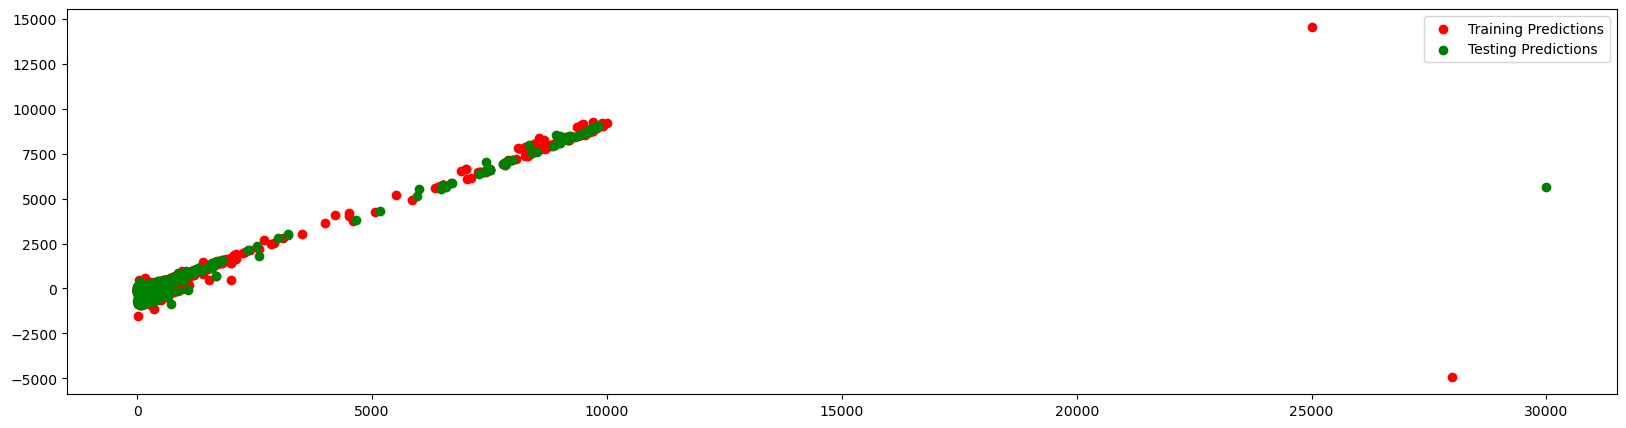

C:\Users\NItesh Agarwal\AppData\Local\Temp\ipykernel_6132\1924443582.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(re, ignore_index = True)


GradientBoostingRegressor()
For Training Data 
 --------------------------------
MAE:  38.80907905239759
MSE:  11245.511084237187
r2:  0.9741679931537318
RMSE:  106.04485411483759

For Test Data 
 --------------------------------
MAE:  41.18140744232589
MSE:  22128.015401525292
r2:  0.9476205125587196
RMSE:  148.75488362243874
Residual Analysis:


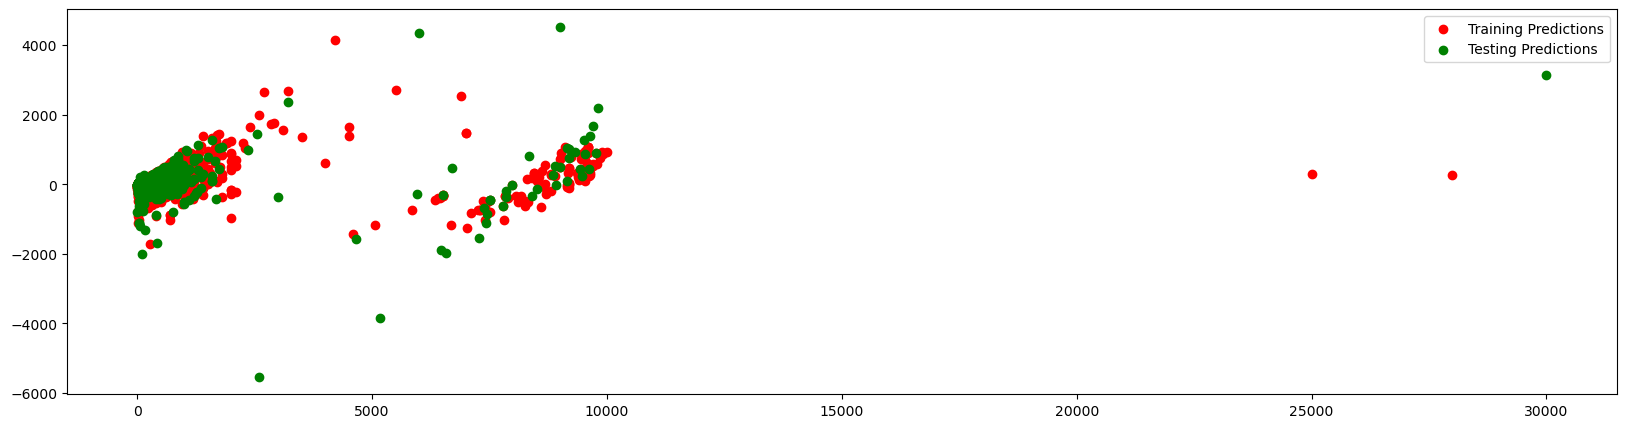

C:\Users\NItesh Agarwal\AppData\Local\Temp\ipykernel_6132\1924443582.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(re, ignore_index = True)


In [15]:
l = (LinearRegression,GradientBoostingRegressor)

for i in l:
    re = pred_model(i, x_train,y_train,x_test,y_test)
    df1 = df1.append(re, ignore_index = True)

In [16]:
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [17]:
data = np.array([[0,0,1,0,0,2,1300,1,1,13,77.6]])
output = model.predict(data)
print(output)

[66.3607471]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [18]:
pickle.dump(model, open('house.pkl','wb'))